In [ ]:
# | default_exp utils/timesteps

# Imports

In [ ]:
# | export


from typing import Literal

import torch
from torch import nn

from vision_architectures.layers.embeddings import (  # noqa: F401
    get_all_timestep_embeddings_1d,
    get_timestep_embeddings_1d,
)

In [ ]:
from matplotlib import pyplot as plt

# Sampler

In [ ]:
# | export


class TimestepSampler(nn.Module):
    """Sampel timesteps using a strategy.

    Args:
        total_timesteps: Total number of timesteps.
        strategy: Sampling strategy. Can be "gamma" or "uniform".
        gamma_alpha: Alpha parameter for the gamma distribution.
        gamma_beta: Beta parameter for the gamma distribution.
    """

    def __init__(
        self,
        total_timesteps: int,
        strategy: Literal["gamma", "uniform"],
        gamma_alpha: float = 1.0,
        gamma_beta: float = 1.0,
    ):
        super().__init__()

        self.total_timesteps = total_timesteps
        self.strategy = strategy

        if strategy == "uniform":
            self.distribution = torch.distributions.Uniform(0, 1)
        elif strategy == "gamma":
            self.distribution = torch.distributions.Gamma(gamma_alpha, gamma_beta)
        else:
            raise NotImplementedError(f"Sampling strategy {strategy} not implemented.")

    def forward(self, num_timesteps: int):
        """Sample timesteps based on the specified strategy.

        Args:
            num_timesteps: Number of timesteps to sample.
        """
        timesteps = self.distribution.sample((num_timesteps,))
        if self.strategy == "gamma":  # Scale it to [0, 1]
            timesteps = timesteps / timesteps.max()
        timesteps = (timesteps * self.total_timesteps).long()
        timesteps = timesteps.clamp(1, self.total_timesteps)
        return timesteps

tensor([294, 930, 853, 622,  96, 609, 126, 106, 266, 870])


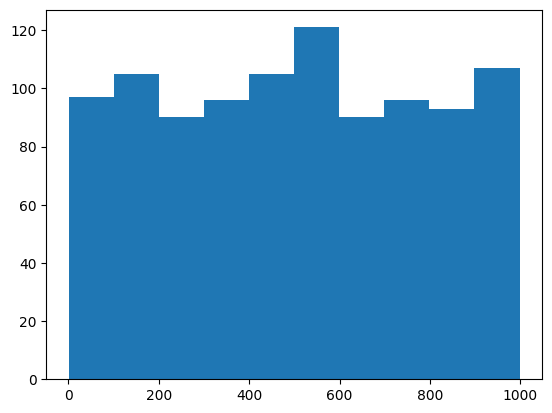

In [ ]:
test = TimestepSampler(1000, "uniform")
print(test(10))

timesteps = test(1000)
plt.hist(timesteps)
plt.show()

tensor([ 394,  597,  109,  247,  297,  163, 1000,  411,   77,   67])


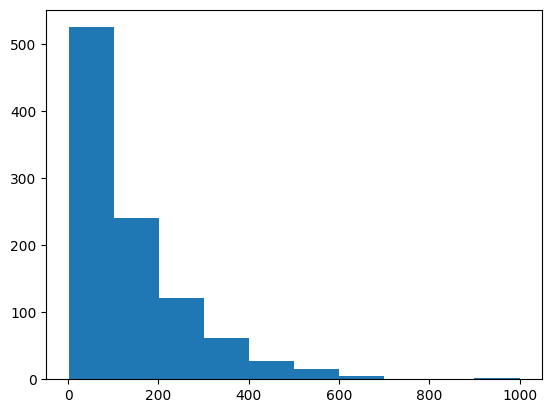

In [ ]:
test = TimestepSampler(1000, "gamma")
print(test(10))

timesteps = test(1000)
plt.hist(timesteps)
plt.show()

# nbdev

In [ ]:
!nbdev_export